#IPL ANALYSIS: 2008-2020

1.IMPORT REQUIRED LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.IMPORT DATA

In [ ]:
matches=pd.read_csv("/content/matches.csv")
deliveries=pd.read_csv("/content/deliveries.csv")

3.EXPLORATORY DATA ANAYSIS (EDA)

In [ ]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
matches.shape

(1095, 20)

In [ ]:
deliveries.shape

(260920, 17)

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

4.DATA CLEANING

1.Replace the dobule name

In [ ]:
matches["team1"].value_counts()

,count
team1,
Royal Challengers Bangalore,135
Chennai Super Kings,128
Mumbai Indians,123
Kolkata Knight Riders,121
Rajasthan Royals,101
Kings XI Punjab,92
Sunrisers Hyderabad,86
Delhi Daredevils,85
Delhi Capitals,41


In [ ]:
matches["team2"].value_counts()

,count
team2,
Mumbai Indians,138
Kolkata Knight Riders,130
Rajasthan Royals,120
Chennai Super Kings,110
Royal Challengers Bangalore,105
Kings XI Punjab,98
Sunrisers Hyderabad,96
Delhi Daredevils,76
Delhi Capitals,50


In [ ]:
deliveries["batting_team"].value_counts()

,count
batting_team,
Mumbai Indians,31437
Kolkata Knight Riders,29514
Chennai Super Kings,28651
Royal Challengers Bangalore,28205
Rajasthan Royals,26242
Kings XI Punjab,22646
Sunrisers Hyderabad,21843
Delhi Daredevils,18786
Delhi Capitals,10946


In [ ]:
matches["team1"]=matches["team1"].replace({"Rising Pune Supergiants":'Rising Pune Supergiant'})
matches["team2"]=matches["team2"].replace({"Rising Pune Supergiants":'Rising Pune Supergiant'})
matches["winner"]=matches["winner"].replace({"Rising Pune Supergiants":'Rising Pune Supergiant'})
matches["toss_winner"]=matches["toss_winner"].replace({"Rising Pune Supergiants":'Rising Pune Supergiant'})

In [ ]:
matches["team1"]=matches["team1"].replace({"Royal Challengers Bengaluru":'Royal Challengers Bangalore'})
matches["team2"]=matches["team2"].replace({"Royal Challengers Bengaluru":'Royal Challengers Bangalore'})
matches["winner"]=matches["winner"].replace({"Royal Challengers Bengaluru":'Royal Challengers Bangalore'})
matches["toss_winner"]=matches["toss_winner"].replace({"Royal Challengers Bengaluru":'Royal Challengers Bangalore'})

In [ ]:
matches['team1'].value_counts()

,count
team1,
Royal Challengers Bangalore,144
Chennai Super Kings,128
Mumbai Indians,123
Kolkata Knight Riders,121
Rajasthan Royals,101
Kings XI Punjab,92
Sunrisers Hyderabad,86
Delhi Daredevils,85
Delhi Capitals,41


In [ ]:
deliveries["bowling_team"]=deliveries["bowling_team"].replace({"Rising Pune Supergiants":'Rising Pune Supergiant'})
deliveries["batting_team"]=deliveries["batting_team"].replace({"Rising Pune Supergiants":'Rising Pune Supergiant'})

In [ ]:
deliveries["bowling_team"]=deliveries["bowling_team"].replace({"Royal Challengers Bengaluru":'Royal Challengers Bangalore'})
deliveries["batting_team"]=deliveries["batting_team"].replace({"Royal Challengers Bengaluru":'Royal Challengers Bangalore'})

In [ ]:
deliveries['bowling_team'].value_counts()

,count
bowling_team,
Mumbai Indians,31505
Royal Challengers Bangalore,30159
Kolkata Knight Riders,29663
Chennai Super Kings,28576
Rajasthan Royals,26432
Kings XI Punjab,22483
Sunrisers Hyderabad,21717
Delhi Daredevils,18725
Delhi Capitals,11216


In [ ]:
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
matches['method'].value_counts()

,count
method,
D/L,21


In [ ]:
matches['city'].fillna('Unknown')
matches['method'].fillna("Non D/L")

In [ ]:
success_ratio=matches.groupby('winner').count()['id']/matches.groupby('team1').count()['id']
success_ratio_desc=success_ratio.sort_values(ascending=False)
success_ratio_desc

,id
winner,
Gujarat Titans,1.333333
Mumbai Indians,1.170732
Delhi Capitals,1.170732
Rajasthan Royals,1.108911
Kolkata Knight Riders,1.082645
Chennai Super Kings,1.078125
Rising Pune Supergiant,1.071429
Lucknow Super Giants,1.043478
Sunrisers Hyderabad,1.023256


5.FINDING INSIDES

##TEAM SUCCESS RATE

<ipython-input-36-cbf554854667>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_ratio_desc.index, y=success_ratio_desc.values,palette='viridis')


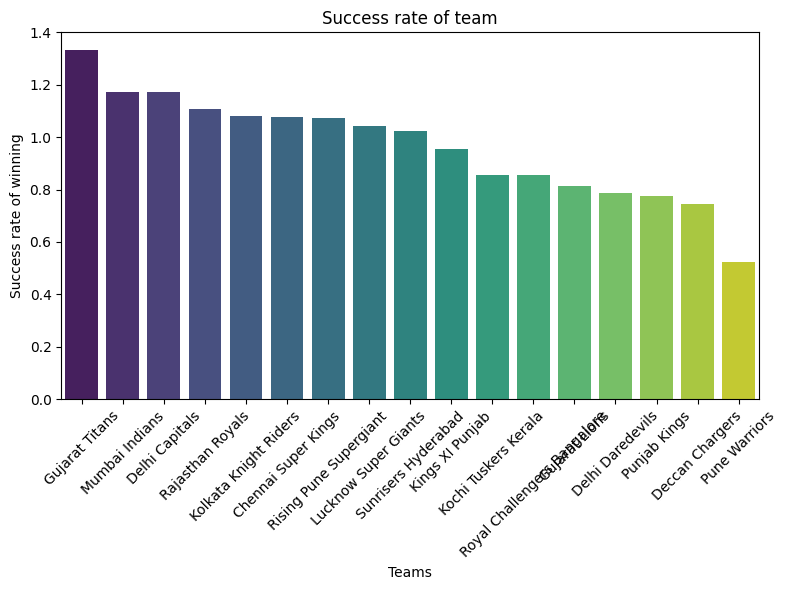

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=success_ratio_desc.index, y=success_ratio_desc.values,palette='viridis')
plt.title('Success rate of team')
plt.xlabel('Teams')
plt.ylabel('Success rate of winning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##MOST TITLE WINS

<ipython-input-44-7137a3732335>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_count.index, y=winner_count.values,palette='viridis')


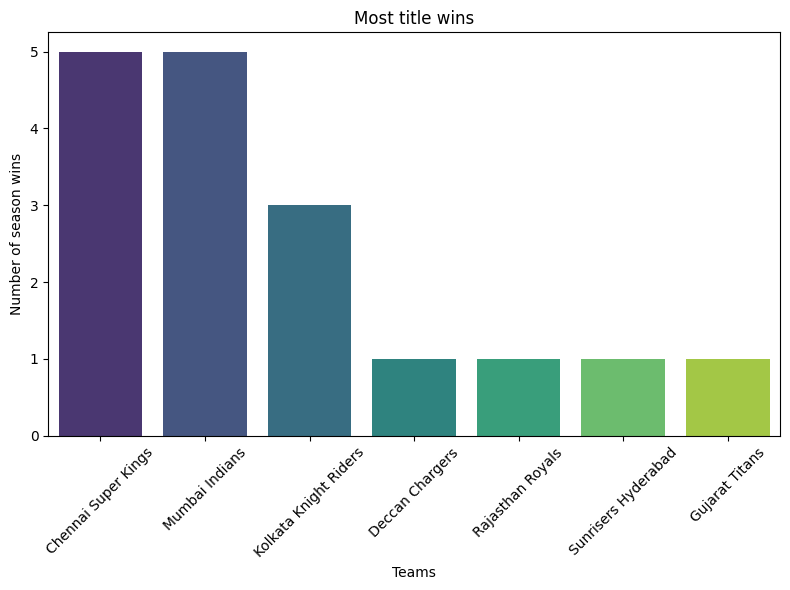

In [ ]:
winner_count=matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=winner_count.index, y=winner_count.values,palette='viridis')
plt.title('Most title wins')
plt.xlabel('Teams')
plt.ylabel('Number of season wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##TOP 10 BATSMAN

<ipython-input-52-8c21ed37caf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batter', y='Runs',data=top_batsman,palette='viridis')


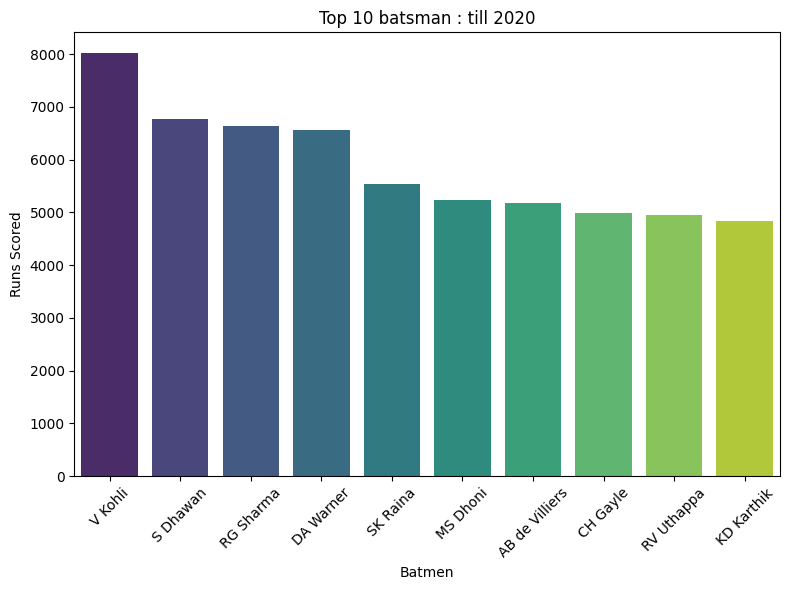

In [ ]:
batting_tot=deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name="Runs")
top_batsman=batting_tot.sort_values(by='Runs',ascending=False)[:10]

plt.figure(figsize=(8, 6))
sns.barplot(x='batter', y='Runs',data=top_batsman,palette='viridis')
plt.title('Top 10 batsman : till 2020')
plt.xlabel('Batmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##BEST PERFORMANCE IN IPL MATCH

In [ ]:
batting_ings=deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index(name='Innings_runs')
top_batsman_scores=batting_ings.sort_values(by='Innings_runs',ascending=False)[:10]

In [ ]:
batting_balls_faced=deliveries.groupby(['match_id','batter'])['ball'].count().reset_index(name='Balls_faced')

In [ ]:
batsman_performances=pd.merge(top_batsman_scores,batting_balls_faced,how="inner",on=['match_id','batter'])
batsman_performances['Strike rate for Match']=np.round(batsman_performances['Innings_runs']*100/batsman_performances['Balls_faced'],2)
batsman_performances

,match_id,batter,Innings_runs,Balls_faced,Strike rate for Match
0,598027,CH Gayle,175,69,253.62
1,335982,BB McCullum,158,77,205.19
2,1304112,Q de Kock,140,71,197.18
3,829795,AB de Villiers,133,61,218.03
4,1216510,KL Rahul,132,70,188.57
5,1370352,Shubman Gill,129,63,204.76
6,980987,AB de Villiers,129,53,243.40
7,548372,CH Gayle,128,62,206.45
8,1136602,RR Pant,128,64,200.00
9,419137,M Vijay,127,57,222.81


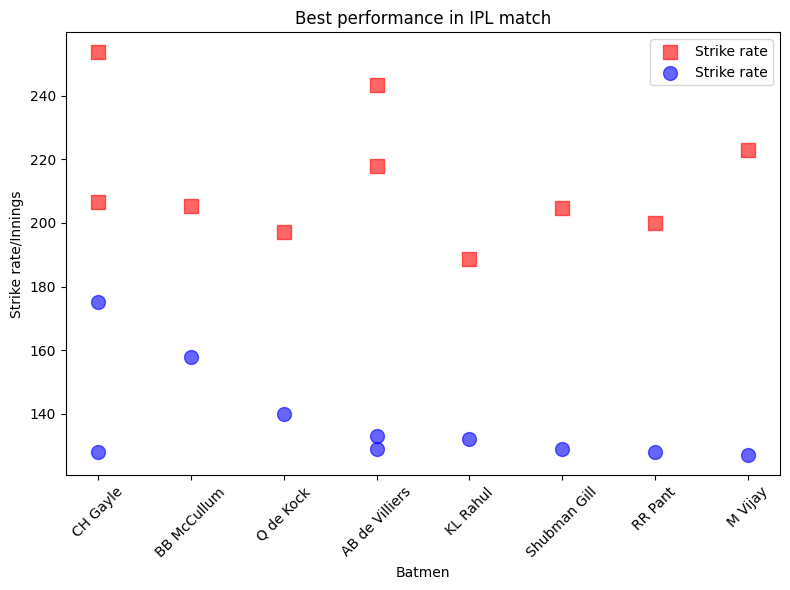

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(batsman_performances['batter'], batsman_performances['Strike rate for Match'],label='Strike rate',s=100,alpha=0.6, color='red',marker='s')
plt.scatter(batsman_performances['batter'], batsman_performances['Innings_runs'],label='Strike rate',s=100,alpha=0.6,color='blue',marker='o')
plt.title('Best performance in IPL match')
plt.xlabel('Batmen')
plt.ylabel('Strike rate/Innings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##TOP 10 BOWLER

In [ ]:
bowling_wickets=deliveries[deliveries['dismissal_kind']!='run out']
top_bowlers=bowling_wickets.groupby("bowler")['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by="Wickets",ascending=False)[:10]

<ipython-input-143-556c6226fd00>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


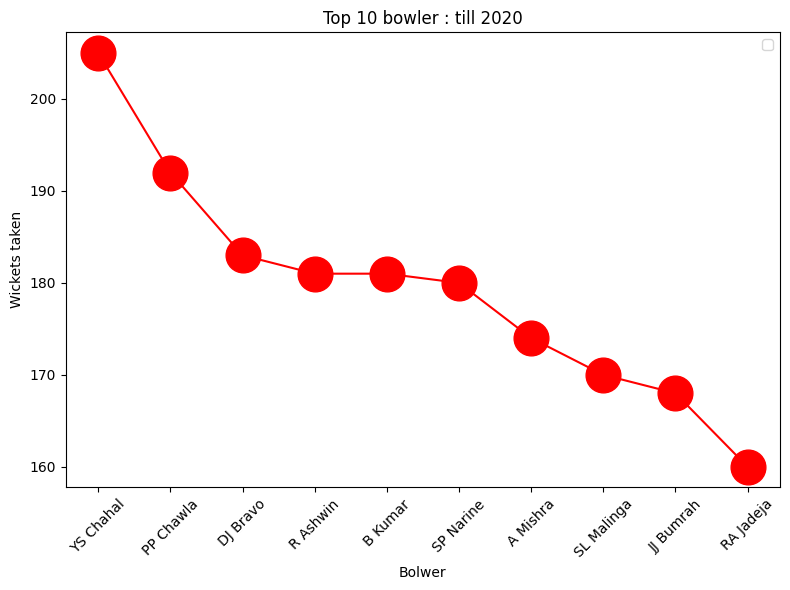

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],marker='o',color='red',ms=25)
plt.title('Top 10 bowler : till 2020')
plt.xlabel('Bolwer')
plt.ylabel('Wickets taken')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##BEST BOWLING PERFORMANCE

In [ ]:
match_bowling_top=bowling_wickets.groupby(['match_id',"bowler"])['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by="Wickets",ascending=False)[:10]

In [ ]:
match_bowlers_runs=deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='Runs Concered')

In [ ]:
match_bowler_performance=pd.merge(match_bowlers_runs,match_bowling_top,how="inner",on=['match_id','bowler'])

In [ ]:
match_bowler_performance['Runs per wickets']=np.round(match_bowler_performance['Runs Concered']/match_bowler_performance['Wickets'],0)
match_bowler_performance

,match_id,bowler,Runs Concered,Wickets,Runs per wickets
0,336005,Sohail Tanvir,15,6,2.0
1,392182,A Kumble,6,5,1.0
2,501251,MM Patel,25,5,5.0
3,980979,A Zampa,19,6,3.0
4,1178394,AS Joseph,14,6,2.0
5,1216512,LH Ferguson,18,5,4.0
6,1216517,JJ Bumrah,29,5,6.0
7,1254111,Arshdeep Singh,33,5,7.0
8,1304086,Umran Malik,26,5,5.0
9,1359536,B Kumar,31,5,6.0


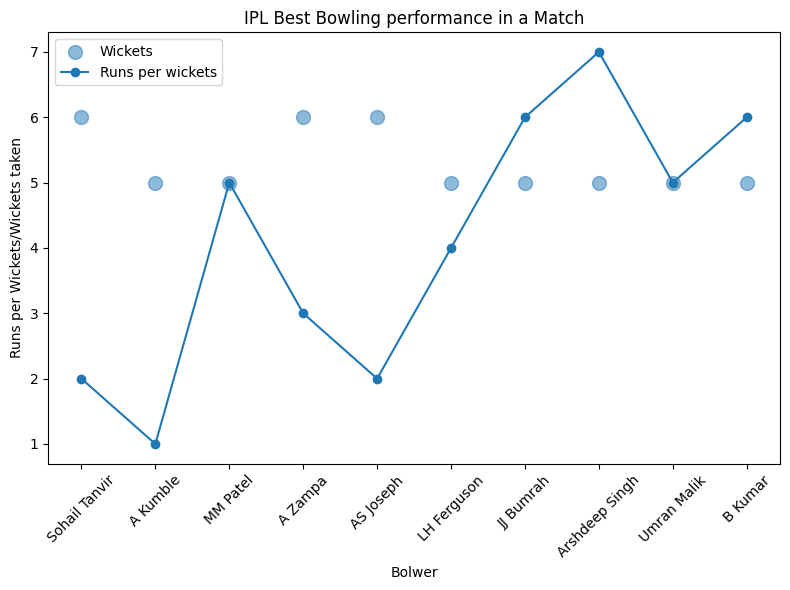

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['Wickets'],label='Wickets',s=100,alpha=0.5)
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per wickets'],marker='o',label='Runs per wickets')
plt.title('IPL Best Bowling performance in a Match')
plt.xlabel('Bolwer')
plt.ylabel('Runs per Wickets/Wickets taken')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

##TOP CITIES

In [ ]:
top_cities=matches['city'].value_counts().reset_index(name='Match count')[:10]

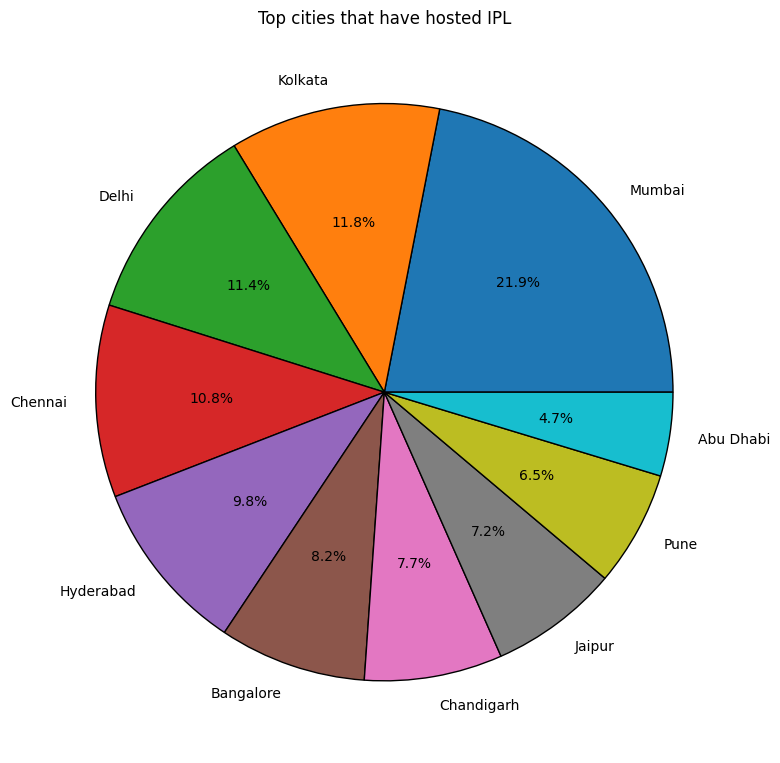

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(top_cities['Match count'],labels=top_cities['city'],autopct='%1.1f%%',wedgeprops=dict(edgecolor='Black'))
plt.title('Top cities that have hosted IPL')
plt.tight_layout()
plt.show()

##TOP DISMISSAL KIND

<ipython-input-163-c2bae6733ca8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dismissal_kind',data=deliveries,palette='viridis')


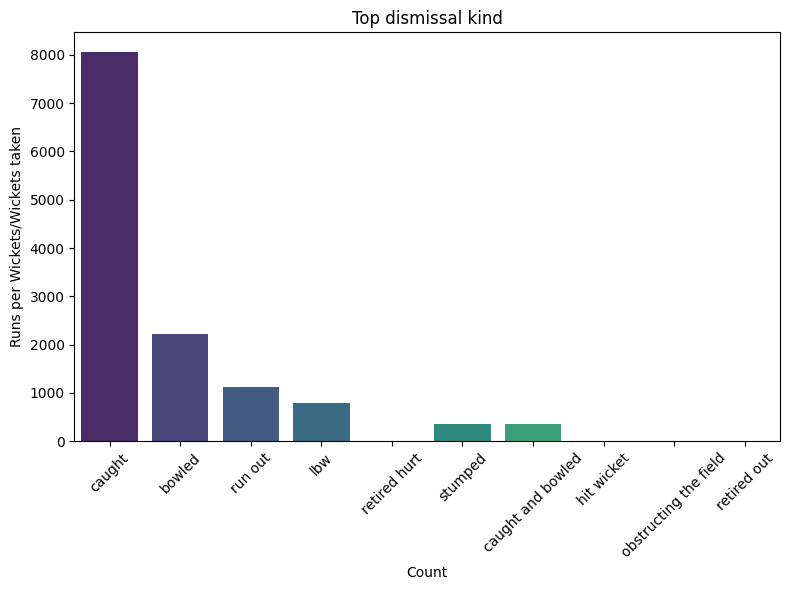

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='dismissal_kind',data=deliveries,palette='viridis')
plt.title('Top dismissal kind')
plt.xlabel('Count')
plt.ylabel('Runs per Wickets/Wickets taken')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##TOP 10 FEILDERS

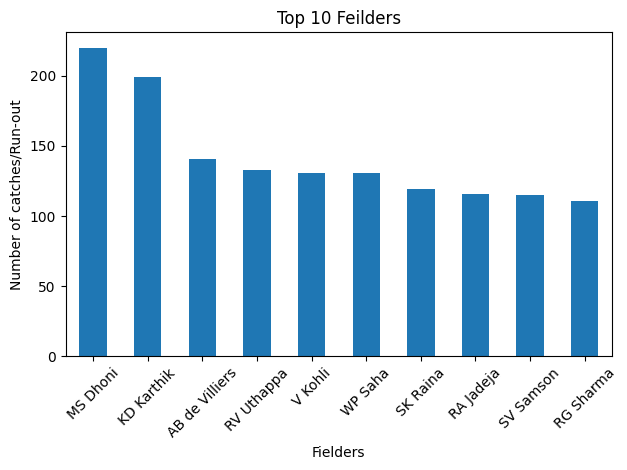

In [ ]:
deliveries['fielder'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Feilders')
plt.xlabel('Fielders')
plt.ylabel('Number of catches/Run-out')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##OVER ANALYSIS

In [ ]:
over_summary=deliveries.groupby('over')[['total_runs','extra_runs','is_wicket','batsman_runs']].sum()

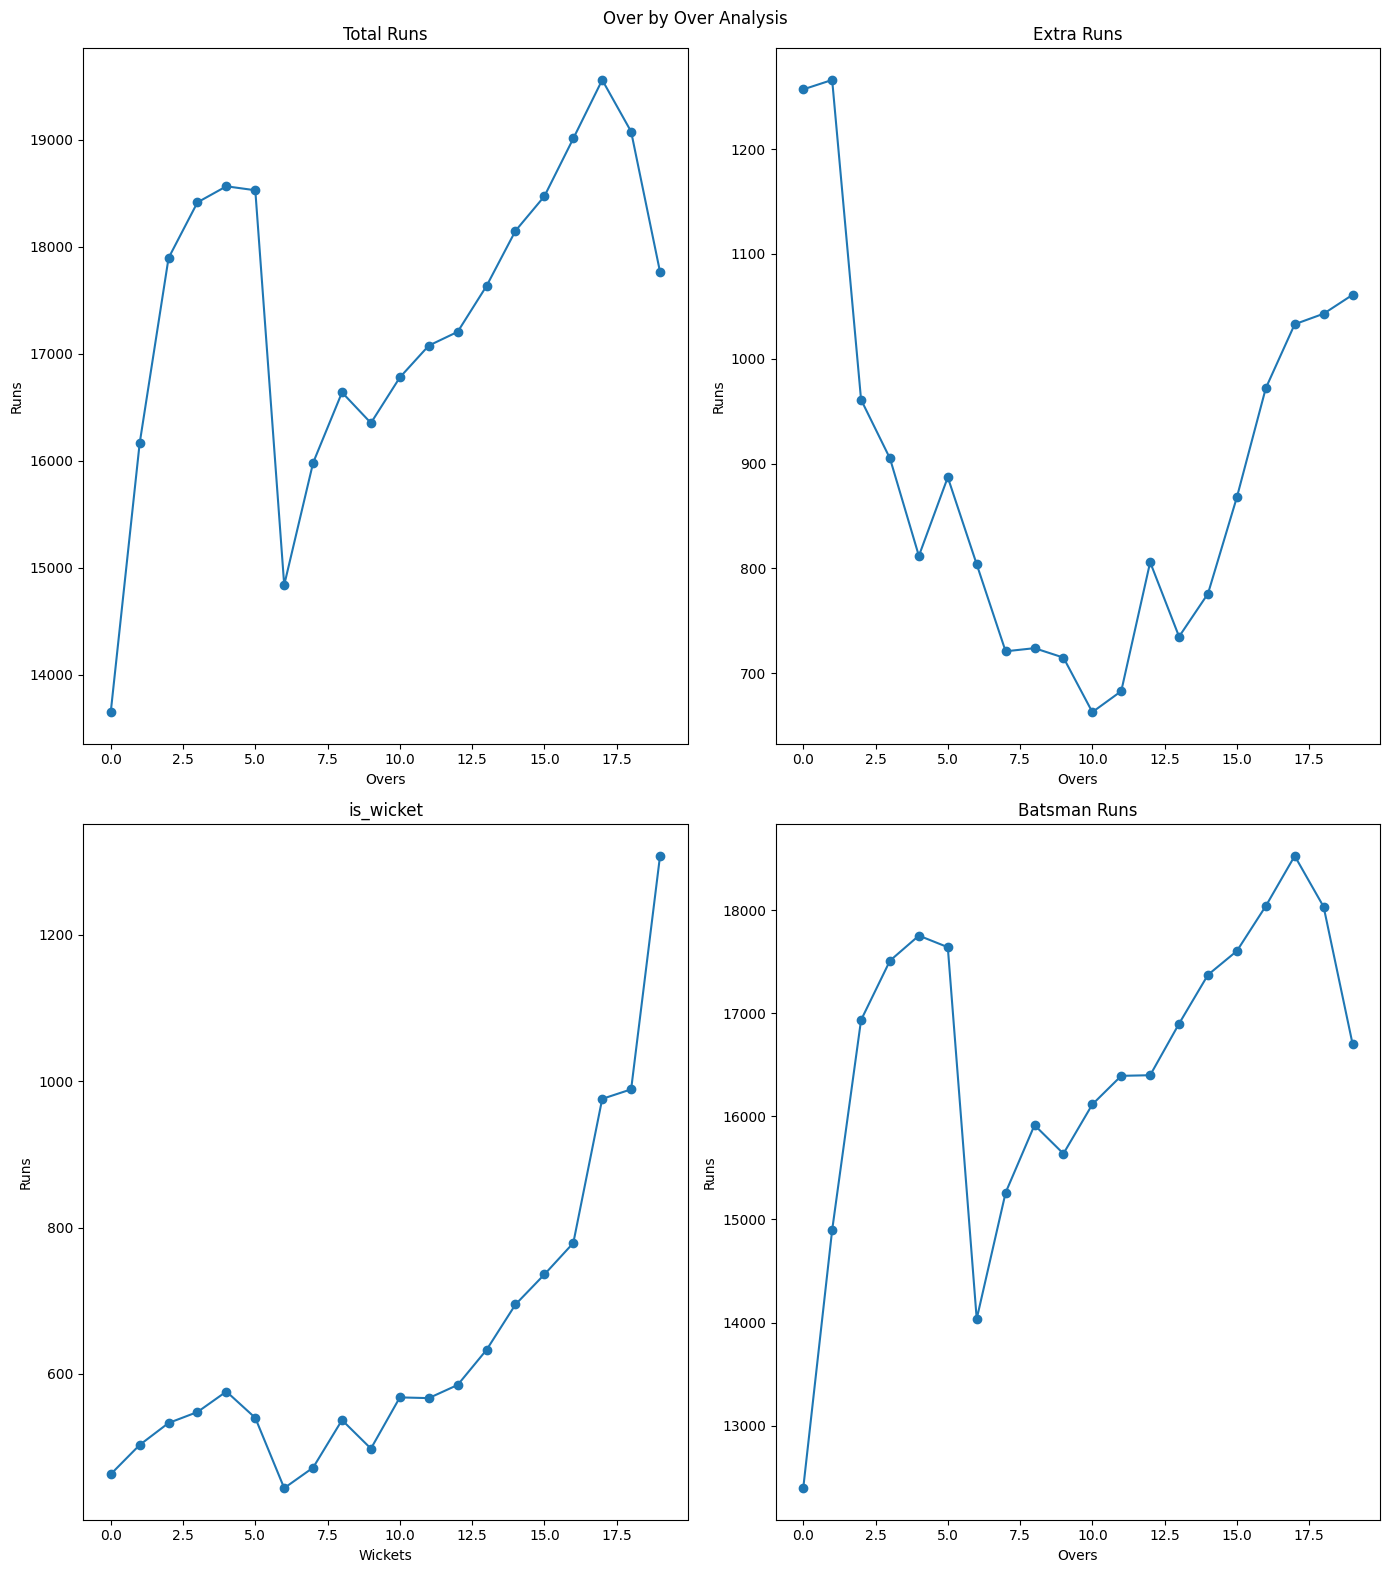

In [ ]:
fig, axes=plt.subplots(2,2,figsize=(14,16))
fig.suptitle("Over by Over Analysis")

axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Overs')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index,over_summary['extra_runs'],marker='o')
axes[0,1].set_title('Extra Runs')
axes[0,1].set_xlabel('Overs')
axes[0,1].set_ylabel('Runs')

axes[1,0].plot(over_summary.index,over_summary['is_wicket'],marker='o')
axes[1,0].set_title('is_wicket')
axes[1,0].set_xlabel('Wickets')
axes[1,0].set_ylabel('Runs')

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o')
axes[1,1].set_title('Batsman Runs')
axes[1,1].set_xlabel('Overs')
axes[1,1].set_ylabel('Runs')

plt.tight_layout()
plt.show()

##TOSS DECISION

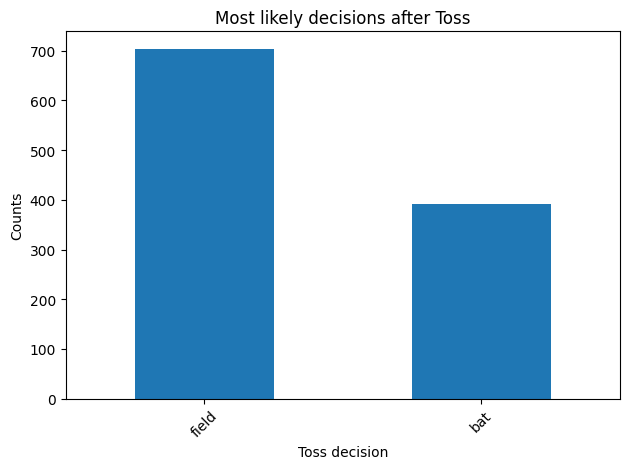

In [ ]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Most likely decisions after Toss')
plt.xlabel('Toss decision')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()